In [1]:
#Importing libaries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [39]:
root = '/Users/beechamb/desktop/lsa-ast361/work/beechamb/lab5/data/'

#Importing the files
zero1 = np.float64(fits.getdata(root + 'kp288925.fits.fz'))
zero2 = np.float64(fits.getdata(root + 'kp288927.fits.fz'))
zero3 = np.float64(fits.getdata(root + 'kp288929.fits.fz'))
zero4 = np.float64(fits.getdata(root + 'kp288931.fits.fz'))
zero5 = np.float64(fits.getdata(root + 'kp288933.fits.fz'))
zero6 = np.float64(fits.getdata(root + 'kp288935.fits.fz'))
zero7 = np.float64(fits.getdata(root + 'kp288936.fits.fz'))
zero8 = np.float64(fits.getdata(root + 'kp288938.fits.fz'))
zero9 = np.float64(fits.getdata(root + 'kp288940.fits.fz'))
zero10 = np.float64(fits.getdata(root + 'kp288943.fits.fz'))
flat1 = np.float64(fits.getdata(root + 'kp288948.fits.fz'))
flat2 = np.float64(fits.getdata(root + 'kp288950.fits.fz'))
flat3 = np.float64(fits.getdata(root + 'kp288952.fits.fz'))
flat4 = np.float64(fits.getdata(root + 'kp288953.fits.fz'))
flat5 = np.float64(fits.getdata(root + 'kp288954.fits.fz'))
flat6 = np.float64(fits.getdata(root + 'kp288956.fits.fz'))
flat7 = np.float64(fits.getdata(root + 'kp288957.fits.fz'))
flat8 = np.float64(fits.getdata(root + 'kp288959.fits.fz'))
flat9 = np.float64(fits.getdata(root + 'kp288961.fits.fz'))
flat10 = np.float64(fits.getdata(root + 'kp288963.fits.fz'))
file2578 = np.float64(fits.getdata(root + 'tu941164.fits.fz'))#notbias
raw = np.float64(fits.getdata(root + 'kp289010.fits.fz'))
science = np.float64(fits.getdata(root + 'tu941456.fits.fz'))


[[ 2477.4  2477.   2476.  ...,  2487.7  2490.2  2343.5]
 [ 2476.1  2477.9  2475.9 ...,  2483.6  2489.   2335.3]
 [ 2477.8  2477.   2477.1 ...,  2485.3  2488.   2335.7]
 ..., 
 [ 2476.4  2476.9  2476.9 ...,  2483.9  2487.5  2337.6]
 [ 2477.6  2476.3  2477.  ...,  2485.6  2488.2  2336.1]
 [ 2477.9  2476.9  2477.5 ...,  2484.2  2488.2  2336.6]]
2477.3954621
6.73803421344


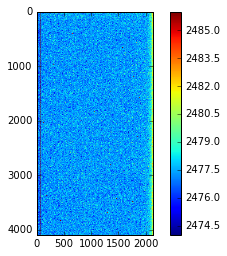

In [15]:
#MasterBias-a&b
zeroaverage = np.float64(((zero1 + zero2 + zero3 + zero4 + zero5 + zero6 + zero7 + zero8 + zero9 + zero10)/10))
flattenedwh = zeroaverage.flatten()
plt.hist(flattenedwh)

print zeroaverage

plt.imshow(zeroaverage, vmin = 2474, vmax = 2486)
plt.colorbar()

zeromean = (np.mean(zeroaverage))
zerostd = np.std(zeroaverage)
print zeromean
print zerostd



In [14]:
plt.hist(flattenedwh, bins = 5000)
plt.xlim(2474,2486)

(2474, 2486)

In [34]:
#MasterFlat-c&d
masterflat = (((flat1 - zeroaverage) + (flat2 - zeroaverage) + (flat3 - zeroaverage) + (flat4 - zeroaverage)
             + (flat5 - zeroaverage) + (flat6 - zeroaverage) + (flat7 - zeroaverage) + (flat8 - zeroaverage)
             + (flat9 - zeroaverage) + (flat10 - zeroaverage))/10)

meanflat = np.mean(masterflat)
stdflat = np.std(masterflat)
print meanflat
print stdflat


7828.93664474
1658.59258527
{'over': 'warn', 'divide': 'warn', 'invalid': 'warn', 'under': 'ignore'}


(7000, 8700)

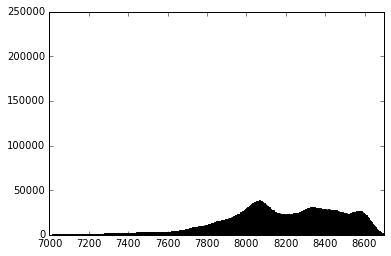

In [25]:
flatflat = masterflat.flatten()
plt.hist(flatflat, bins = 5000)
plt.xlim(7000,8700)

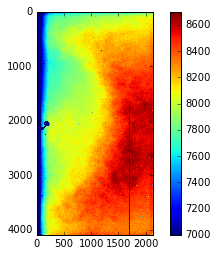

In [26]:
plt.imshow(masterflat, vmin = 7000, vmax = 8700)
plt.colorbar()

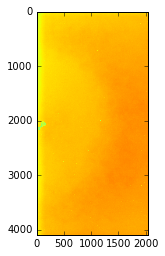

In [29]:
#NOAO's MASTAHFLAT
plt.imshow(file2578)

In [40]:
#Their Science
plt.imshow(science)

In [74]:
#Their Raw
plt.imshow(raw,vmin=4000,vmax=6000)

In [80]:
#Calibrating...
newflat = masterflat[0:,200:]
flatcal = newflat/(meanflat)

idx = []
idx = np.where(flatcal ==0)

for i in idx:
    flatcal[idx[0],idx[1]]=0.1
    
mycal = (raw[0:,200:]-zeroaverage[0:,200:])/flatcal
plt.hist(mycal.flatten(),bins = 1000, range = (0,50000))
plt.xlim(1800,2400)
print(flatcal)
plt.show()

[[  7.39053113e-01   7.37047732e-01   7.36357983e-01 ...,   2.68235662e-04
    6.38656337e-04   3.32101295e-04]
 [  8.38402493e-01   8.45108384e-01   8.40829387e-01 ...,   1.78823774e-04
   -2.93781915e-04   3.83193802e-05]
 [  8.59529245e-01   8.57702687e-01   8.64766227e-01 ...,   1.14958141e-04
   -2.17143155e-04   1.27731267e-04]
 ..., 
 [  9.94272959e-01   9.97210778e-01   1.00009750e+00 ...,   1.02185014e-04
   -2.17143155e-04  -3.57647549e-04]
 [  9.75700832e-01   9.71945533e-01   9.74857806e-01 ...,  -5.10925070e-05
   -1.02185014e-04  -2.04370028e-04]
 [  8.94936352e-01   8.91398196e-01   8.96801228e-01 ...,  -1.66050648e-04
    2.55462535e-05  -1.91596901e-04]]


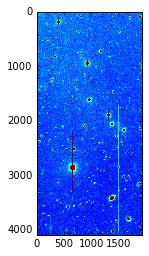

In [81]:
plt.imshow(mycal, vmin = 1800, vmax = 2400)